# Regression Model for Diagnosing Breast Cancer
In this project, we will use regression algorithm based on the physical features of a cell to predict if it's melignant or benign. The dataset sourced from [kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv).

### Table of contents
- [Exploratory Analysis](#Exploratory-Analysis)
- [Data Preprocessing](#Data-preprocessing)
- [Validation and Model Selection](#Validation-and-Model-Selection)
- [Conclusion](#Conclusion)

## Exploratory Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import metrics

### Read the file

In [2]:
# Read the csv file into pandas dataframe
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Check null values

In [3]:
# Check null values
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [4]:
# Drop null column
data.drop('Unnamed: 32', axis = 1, inplace = True)

### Descriptive statistics

In [5]:
# Descriptive statistics
data.iloc[:,1:].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Eliminating outliers by using Z-score

Mathematical formulation of the z-score is:
\begin{equation}
z = \frac{X - \mu}{\sigma}
\end{equation}

Its interpretation is take the data point or observation, substract the mean of the population and divide it by the standard deviation. The data points which are too far from zero z-score are considered as outliers. In most cases threshold for outlier detection is either z-score>3 or z-score<-3. For this purpose we will use zscore function defined in SciPy library and set the threshold=3. 

In [6]:
# Get z scores
z = np.abs(stats.zscore(data.iloc[:,2:]))
print(z)

[[1.09706398 2.07333501 1.26993369 ... 2.29607613 2.75062224 1.93701461]
 [1.82982061 0.35363241 1.68595471 ... 1.0870843  0.24388967 0.28118999]
 [1.57988811 0.45618695 1.56650313 ... 1.95500035 1.152255   0.20139121]
 ...
 [0.70228425 2.0455738  0.67267578 ... 0.41406869 1.10454895 0.31840916]
 [1.83834103 2.33645719 1.98252415 ... 2.28998549 1.91908301 2.21963528]
 [1.80840125 1.22179204 1.81438851 ... 1.74506282 0.04813821 0.75120669]]


In [7]:
# Drop columns above z=3 threshold
data.iloc[:,2:] = data.iloc[:,2:][(z < 3).all(axis=1)]
data.shape

(569, 32)

In [8]:
# Drop removed outliers
data = data.dropna()
data.shape

(495, 32)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 566
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       495 non-null    int64  
 1   diagnosis                495 non-null    object 
 2   radius_mean              495 non-null    float64
 3   texture_mean             495 non-null    float64
 4   perimeter_mean           495 non-null    float64
 5   area_mean                495 non-null    float64
 6   smoothness_mean          495 non-null    float64
 7   compactness_mean         495 non-null    float64
 8   concavity_mean           495 non-null    float64
 9   concave points_mean      495 non-null    float64
 10  symmetry_mean            495 non-null    float64
 11  fractal_dimension_mean   495 non-null    float64
 12  radius_se                495 non-null    float64
 13  texture_se               495 non-null    float64
 14  perimeter_se             4

### Check class imbalance

In [10]:
# To see if there is any class imbalance
data['diagnosis'].value_counts()

B    332
M    163
Name: diagnosis, dtype: int64

### Histogram

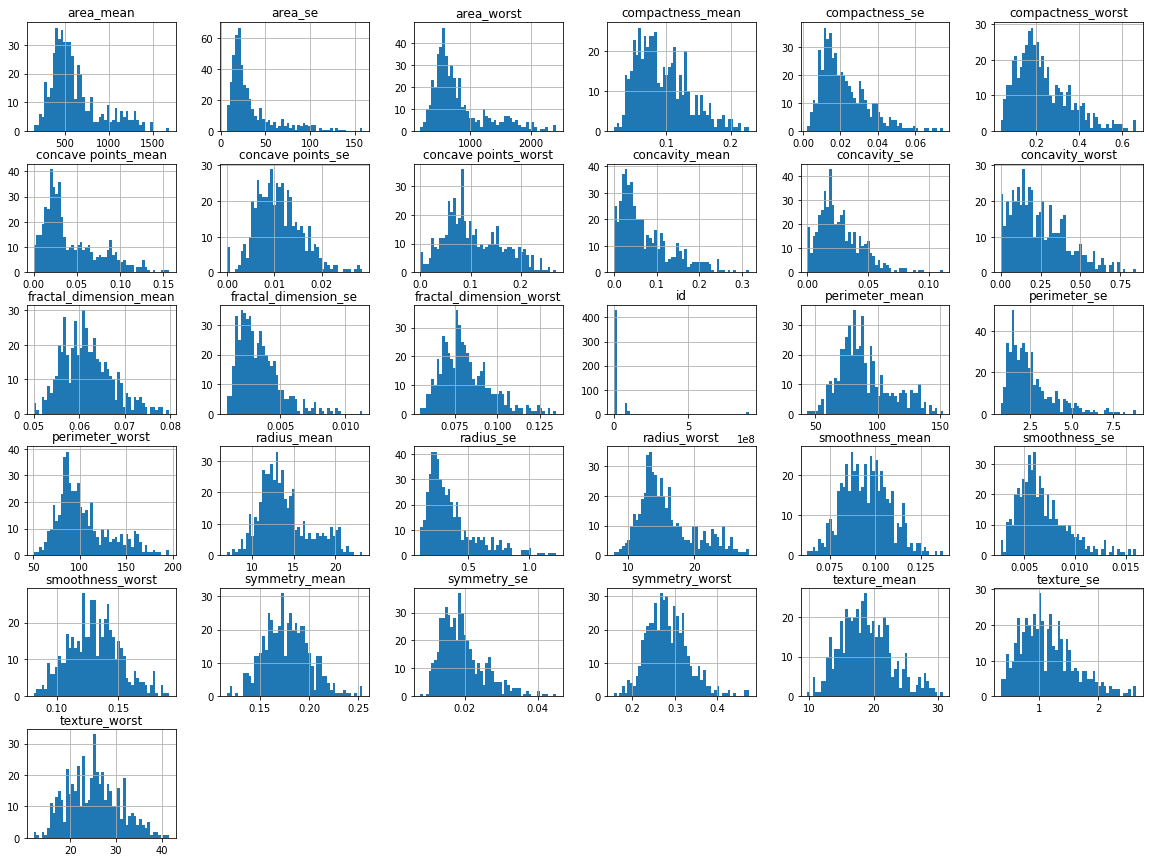

In [11]:
# Histogram for each numerical attribute
%matplotlib inline
data.hist(bins=50,figsize=(20,15))
plt.show()

## Data preprocessing

In [12]:
# Categorical to binary numeric
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["diagnosis_code"] = lb_make.fit_transform(data["diagnosis"])
data[["diagnosis_code", "diagnosis"]].head(20)

,diagnosis_code,diagnosis
1,1,M
2,1,M
4,1,M
5,1,M
6,1,M
7,1,M
8,1,M
10,1,M
11,1,M
13,1,M


In [13]:
data.drop('diagnosis', axis = 1, inplace = True)
data.drop('id', axis = 1, inplace = True)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_code
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1


In [14]:
# Define features X
X = np.asarray(data.iloc[:,:-1])
X[0:5]

array([[2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e+02, 1.709e+03,
        1.444e-01, 4.245e-01, 4.504e-01, 2.430e-01, 3.613e-01, 8.758e-02],
       [2.029e+01, 1.434e+01, 1.351e+02, 1.297e+03, 1.003e-01, 1.328e-01,
        1.980e-01, 1.043e-01, 1.809e-01, 5.883e-02, 7.572e-01, 7.813e-01,
        5.438e+00, 9.444e+01, 1.149e-02, 2.461e-02, 5.688e-02, 1.885e-02,
        1.756e-02, 5.115e-03, 2.254e

In [15]:
# Define target y
y = np.asarray(data['diagnosis_code'])
y[0:5]

array([1, 1, 1, 1, 1])

In [16]:
# Standardize the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 2.20446536, -0.28261218,  2.06835079,  2.45413129, -0.80683281,
        -0.39241417,  0.20695702,  0.82614227,  0.15483511, -0.9222883 ,
         0.87291874, -0.90918495,  0.59218902,  1.44684628, -0.62895106,
        -0.71516656, -0.47629673,  0.51102822, -0.89927071,  0.1250569 ,
         2.21566986, -0.30781919,  1.93887045,  2.50942102, -0.33396147,
        -0.35546782,  0.00413471,  1.36512913, -0.17708262,  0.52461532],
       [ 1.91497191,  0.5956785 ,  1.92875368,  2.02498163,  1.13403069,
         1.58811846,  1.99987823,  2.60149804,  1.26093058, -0.32300767,
         1.8630898 , -0.79403636,  1.42980361,  2.17117196, -0.2510575 ,
         1.41772322,  0.63966934,  1.99724809,  0.51303008,  0.77123744,
         1.87156245,  0.06672045,  1.71612918,  1.96345992,  0.64478602,
         1.54007241,  1.22637453,  2.34544773,  1.56196975,  0.42458997],
       [ 2.11235381, -1.14828374,  2.17425205,  2.35294966,  0.40796349,
         0.92761594,  2.00961355,  1.87573334,  0

## Validation and Model Selection


### Train/Test Dataset
Let's split dataset into 80% train and 20% test set.

In [17]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (396, 30) (396,)
Test set: (99, 30) (99,)


### Logistic Regression

Let's see if logistic regression model fits our dataset.

In [18]:
# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


# Train and fit model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict out-of-sample test set
y_pred = logreg.predict(X_test)

# classification report for test set
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print('accuracy',accuracy_score(y_test, y_pred))

# Calculate cv score with 10 folds
accuracy = cross_val_score(logreg, X, y,cv=10)
print('cross validation score ',accuracy.mean())


              precision    recall  f1-score   support

           0      0.972     1.000     0.986        69
           1      1.000     0.933     0.966        30

    accuracy                          0.980        99
   macro avg      0.986     0.967     0.976        99
weighted avg      0.980     0.980     0.980        99

accuracy 0.9797979797979798
cross validation score  0.9838367346938774


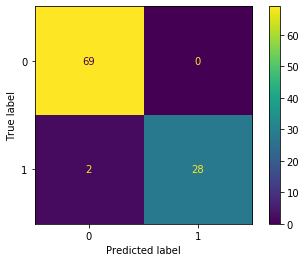

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)

All 69 benign(0) cells were predicted as 0, which gives us the recall 1.0, and 28 out of 30 malignant cells were predicted correctly which is why the recall of category 1 is 0.933.

If we look at the precision, all 28 of category 0 is actually category 0, so we have a precision of 1.0 for this category. On the other hand, 69 out of 71 predicted category 0 is actually 0. So the precision for this category is 0.972. 

In this case, we wouldn't want a patient to be diagnosed as not having cancer when they actually have cancer. That's why we will try to improve the precision for category 0. 

In [20]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(logreg, X_train, y_train, cv=10, method = 'decision_function')

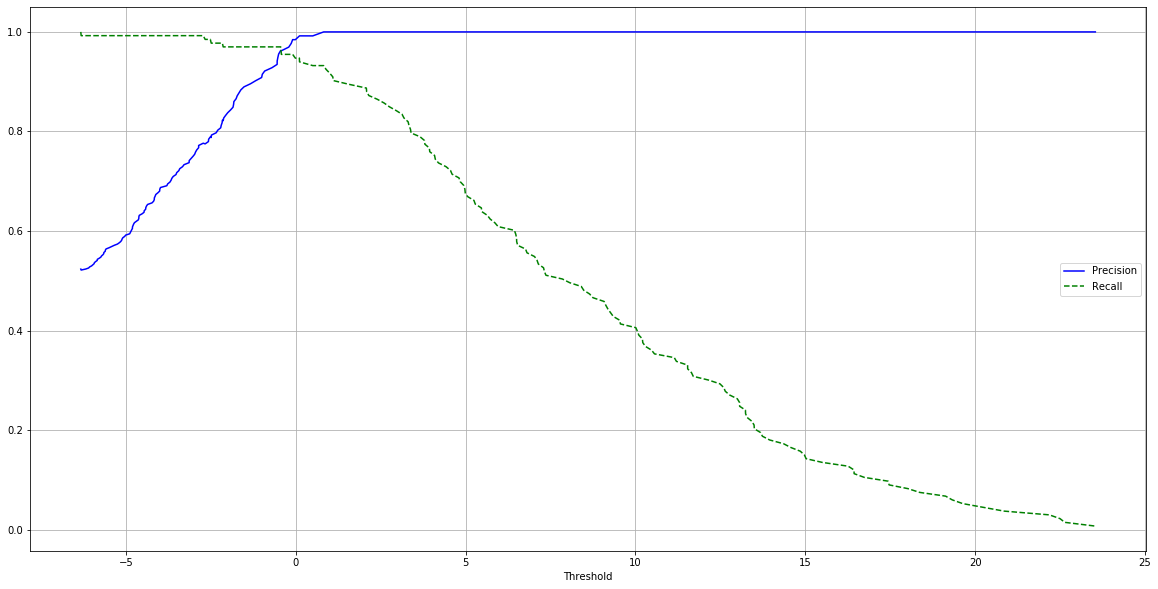

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(20,10))
    plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend(loc="right")
    plt.grid()
    

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

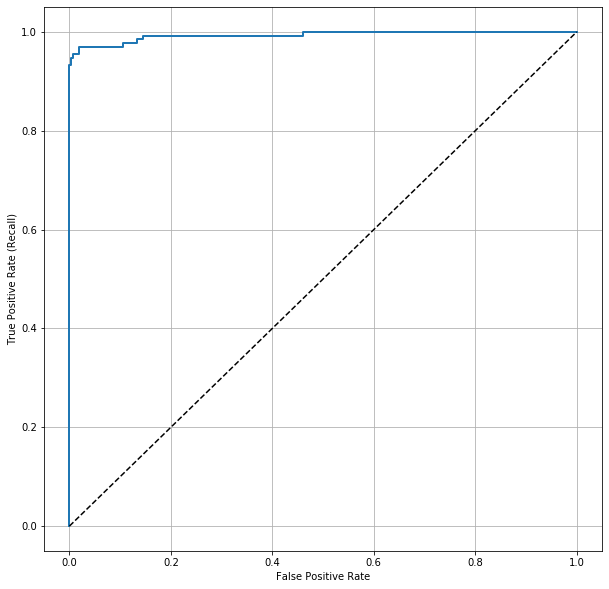

In [22]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
    
plot_roc_curve(fpr, tpr)
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.9932530947139712